# Required Libraries Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

#Load Dataset

In [5]:
df = pd.read_csv('supply_chain_data.csv')

#Data Overview

In [6]:
print(df.info())  # Structure of dataset
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

#Handle Missing Values

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Numeric missing values
df.fillna('Unknown', inplace=True)  # Categorical missing values

#Encode Categorical Features

In [16]:
categorical_cols = ['Product type', 'SKU', 'Supplier name', 'Shipping carriers', 'Location', 'Inspection results', 'Transportation modes']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numeric
    label_encoders[col] = le  # Store encoder for future use

#Exploratory Data Analysis (EDA)

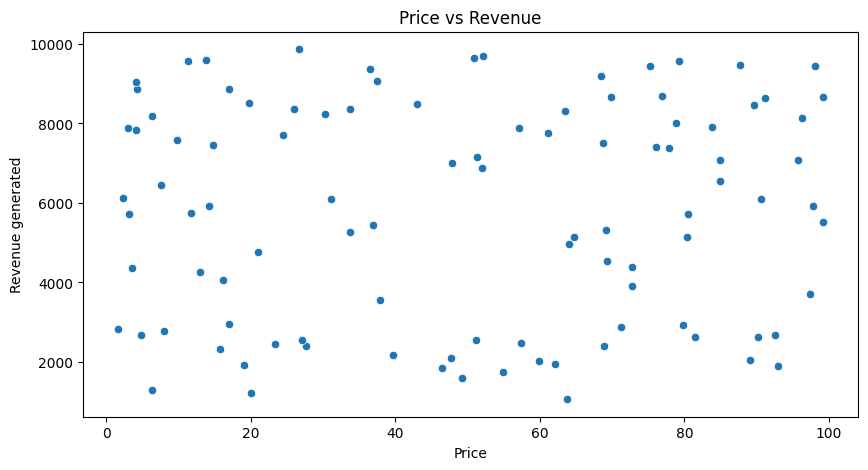

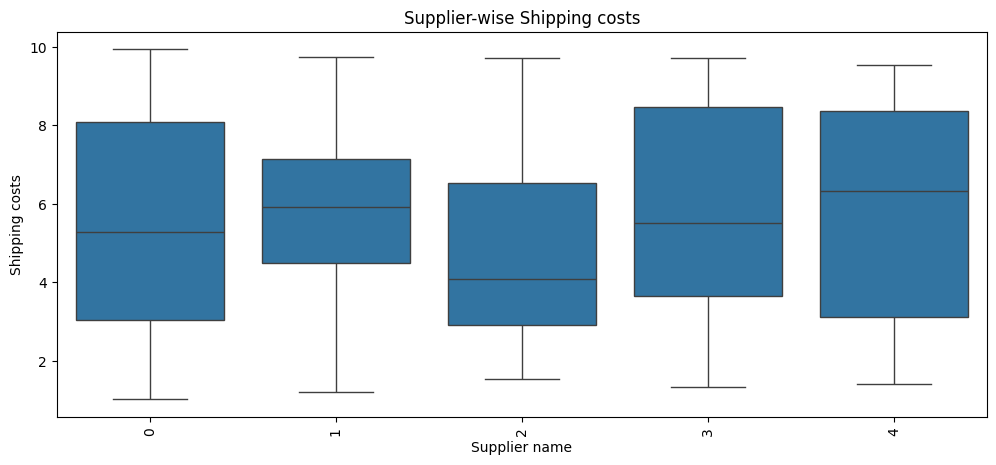

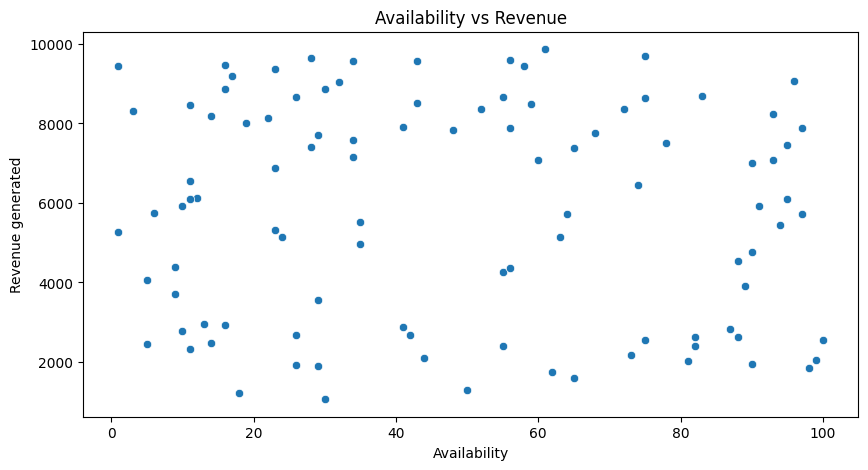

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Price'], y=df['Revenue generated'])
plt.title("Price vs Revenue")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="Supplier name", y="Shipping costs", data=df)
plt.xticks(rotation=90)
plt.title("Supplier-wise Shipping costs")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Availability'], y=df['Revenue generated'])
plt.title("Availability vs Revenue")
plt.show()


#Feature Selection

In [30]:
features = ['Price', 'Availability', 'Stock levels', 'Lead times', 'Shipping costs']
target = 'Revenue generated'

In [31]:
X = df[features]
y = df[target]

#Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Machine Learning Model (Random Forest)

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#Model Evaluation

In [35]:
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 9873745.159524161
R² Score: -0.228670030289702


#Save Model

In [36]:
joblib.dump(model, 'demand_forecasting_model.pkl')

['demand_forecasting_model.pkl']

#Load Model for Future Predictions

In [46]:
loaded_model = joblib.load('demand_forecasting_model.pkl')
new_data_df = pd.DataFrame(new_data, columns=['Price', 'Availability', 'Stock levels', 'Lead times', 'Shipping costs'])
new_data_scaled = scaler.transform(new_data_df)
predicted_revenue = loaded_model.predict(new_data_scaled)
print(f"Predicted Revenue: {predicted_revenue[0]}")

Predicted Revenue: 4898.487403700786


#Supplier & Shipping Optimization

In [47]:
best_suppliers = df.groupby("Supplier name")[["Lead times", "Shipping costs"]].mean()
best_suppliers = best_suppliers.sort_values(by=['Lead times', 'Shipping costs'], ascending=[True, True])
print(best_suppliers.head())
best_carriers = df.groupby("Shipping carriers")["Shipping costs"].mean()
print(best_carriers.sort_values())

               Lead times  Shipping costs
Supplier name                            
2               14.333333        4.788771
4               14.722222        5.789832
1               16.227273        5.739178
0               16.777778        5.512302
3               17.000000        5.759573
Shipping carriers
1    5.509247
0    5.554923
2    5.599292
Name: Shipping costs, dtype: float64
